In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
dataframe = pd.read_csv(r"indicadores_H5W1_sentencebert_CLASS.csv")
dataframe

,Who,Where,When,What,Why,How,Additional information,CLASS
0,0.696783,0.076060,0.000000,0.505262,0.000000,0.170564,0.000000,entailment
1,0.762582,0.087866,0.190637,0.944161,0.063499,0.223710,0.699488,entailment
2,0.881357,0.265408,0.000000,0.360803,0.000000,0.317074,0.068419,contradiction
3,0.153366,0.203428,0.000000,0.358316,0.000000,0.000000,0.000000,contradiction
4,0.919903,0.715984,0.000000,0.224679,0.000000,0.000000,0.172891,neutral
...,...,...,...,...,...,...,...,...
95,0.706643,0.210286,0.000000,0.570392,0.000000,0.137777,0.000000,entailment
96,0.894956,0.000000,0.000000,0.830284,0.000000,0.000000,0.000000,entailment
97,0.072305,0.000000,0.000000,0.086890,0.000000,0.189328,0.000000,contradiction
98,0.655674,0.139479,0.000000,0.357685,0.000000,0.000000,0.000000,contradiction


In [5]:
dataframe.describe()

,Who,Where,When,What,Why,How,Additional information
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.649812,0.271093,0.090596,0.405254,0.094444,0.105398,0.130433
std,0.285327,0.278851,0.171786,0.290139,0.180641,0.154895,0.192638
min,0.000000,0.000000,0.000000,-0.011613,-0.009505,-0.002661,-0.061773
25%,0.474195,0.086424,0.000000,0.171322,0.000000,0.000000,0.000000
50%,0.681552,0.206847,0.000000,0.326847,0.000000,0.041717,0.083760
75%,0.896777,0.302398,0.187566,0.635148,0.187566,0.187566,0.187566
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


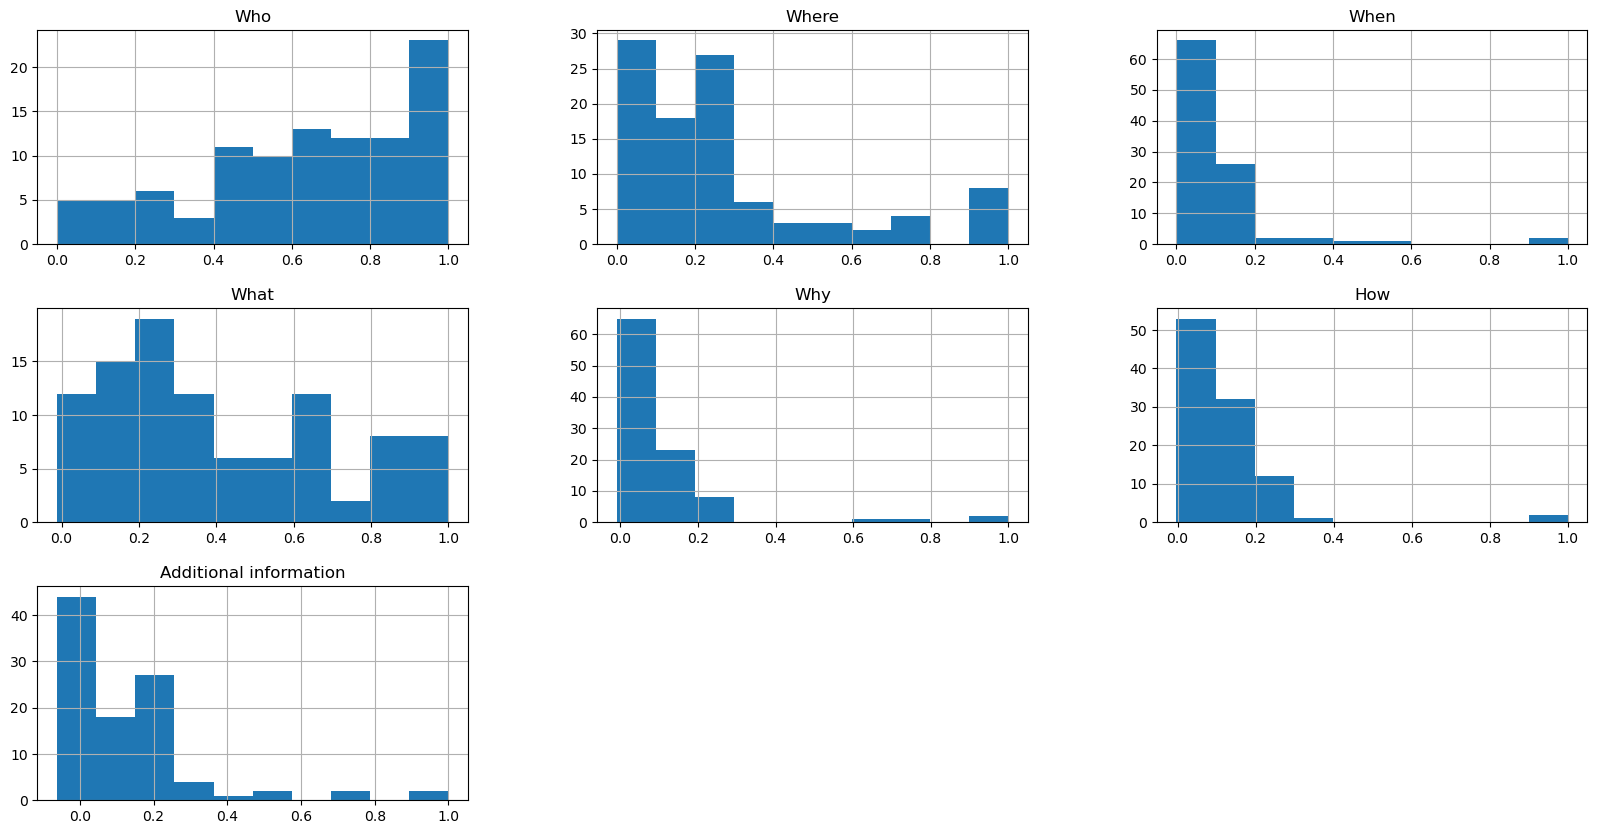

In [7]:
dataframe.hist(figsize=(20,10))
plt.show()

c:\Users\Ninja\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


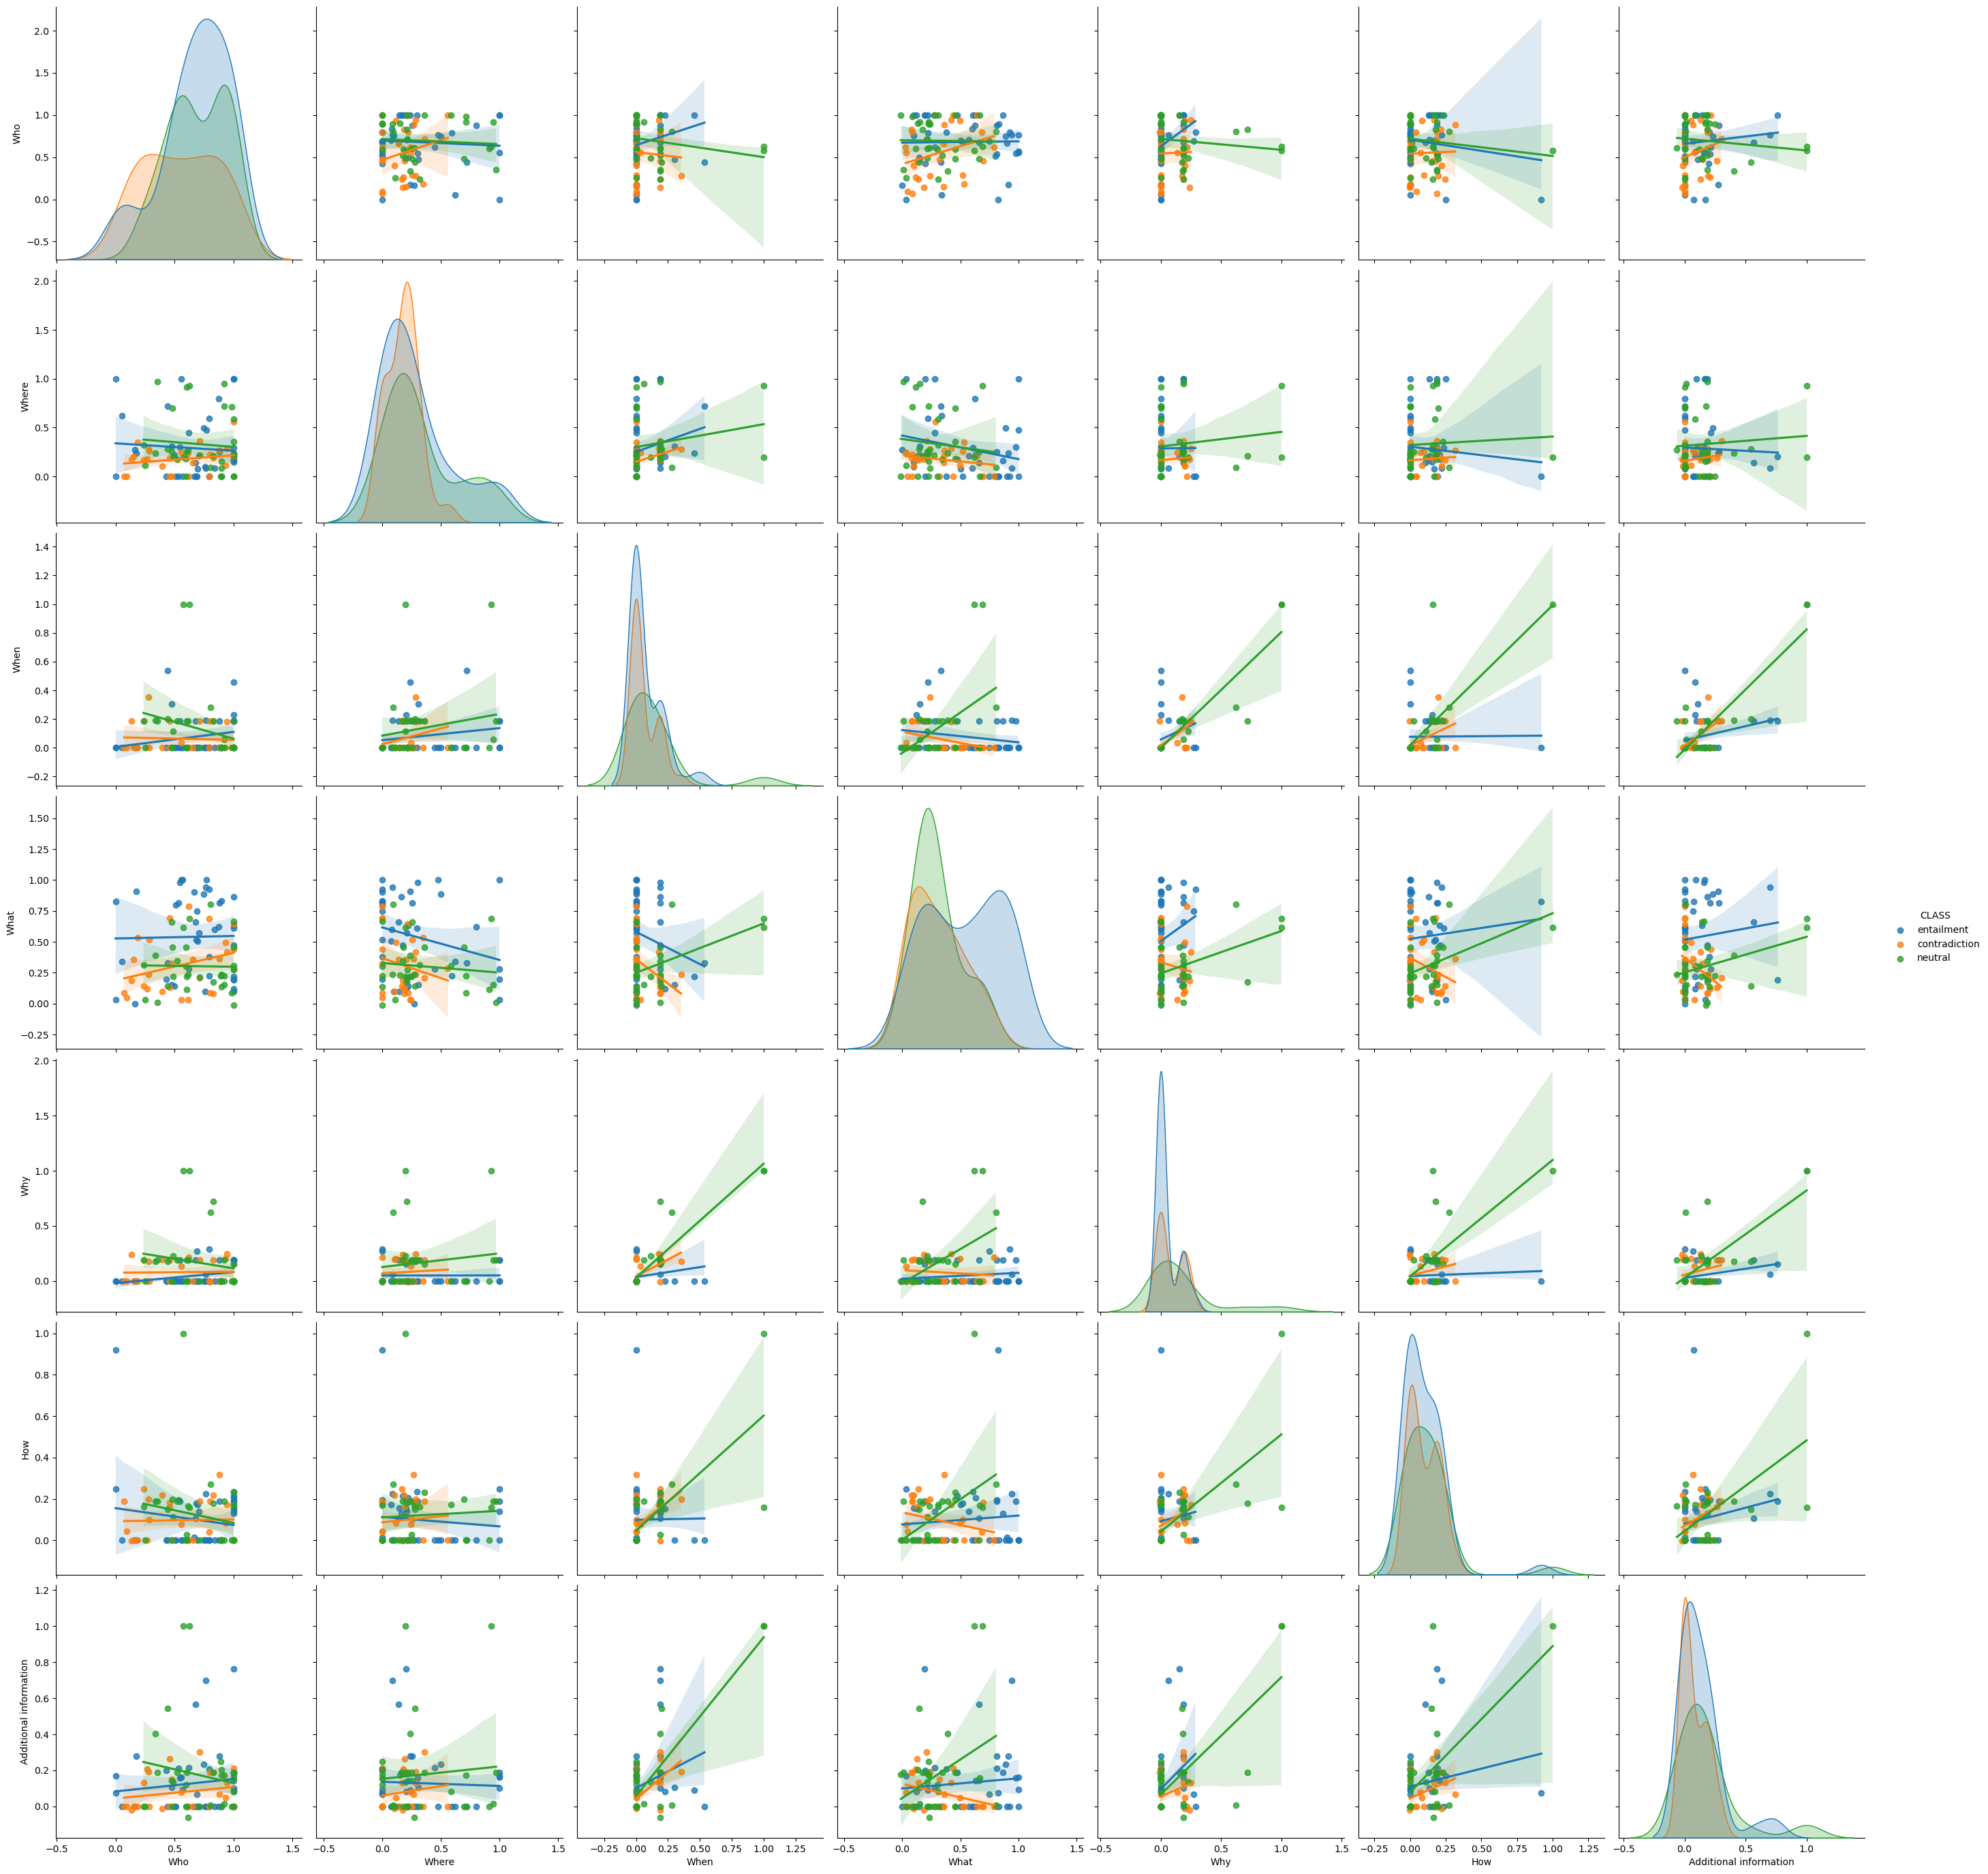

In [8]:
sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=['Who','Where','When','What','Why','How','Additional information'],kind='reg')

In [9]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_19612\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_19612\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 7)

In [10]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [11]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [12]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [13]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
model.decision_function(X)

array([[-0.16041199,  0.30041155, -0.13999956],
       [-0.35719945,  0.48538418, -0.12818474],
       [-0.22215915,  0.26587854, -0.04371939],
       [-0.04099956,  0.19876684, -0.15776728],
       [-0.30761088,  0.25029744,  0.05731344],
       [-0.22048353,  0.08188156,  0.13860197],
       [-0.56070332,  0.237128  ,  0.32357531],
       [-0.4051301 ,  0.26149988,  0.14363022],
       [-0.39071649,  0.12907057,  0.26164592],
       [-0.14452044,  0.29985632, -0.15533588],
       [-0.12433726,  0.09842683,  0.02591043],
       [-0.11362447,  0.28367226, -0.17004779],
       [-0.21298468,  0.46965974, -0.25667506],
       [-0.04349972,  0.06521947, -0.02171975],
       [-0.15683556,  0.09913939,  0.05769617],
       [-0.33533957,  0.19753374,  0.13780583],
       [-0.29847654,  0.39573639, -0.09725985],
       [-0.2834043 ,  0.27242514,  0.01097915],
       [-0.18569155,  0.37881696, -0.19312541],
       [-0.20177075,  0.35880501, -0.15703426],
       [-0.15899288,  0.15353975,  0.005

In [15]:
labels=np.array(['Who','Where','When','What','Why','How','Additional information'])

In [16]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [17]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [18]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  5 How 1 Where
Entailment  3 What 4 Why
Neutral  4 Why 3 What


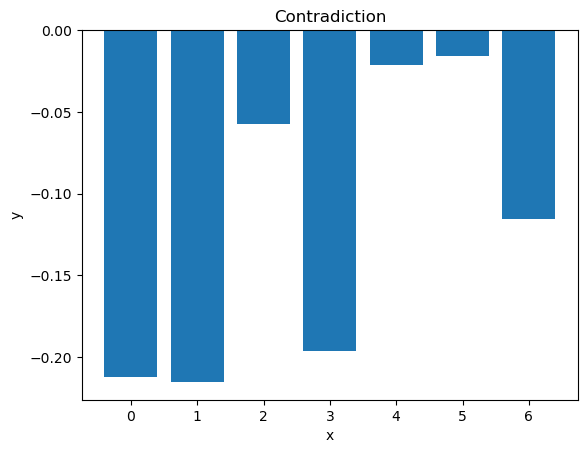

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,7,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

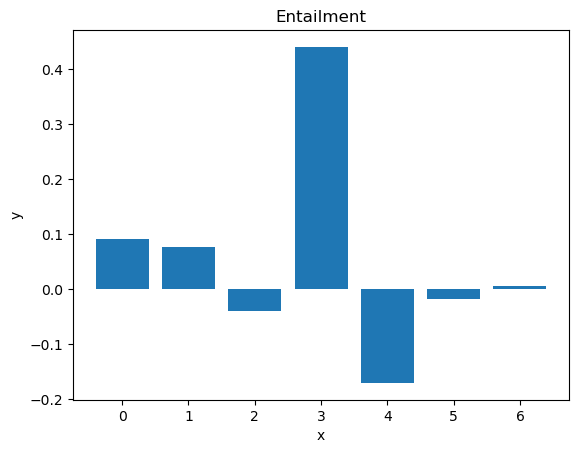

In [21]:
x_v = np.arange(0,7,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

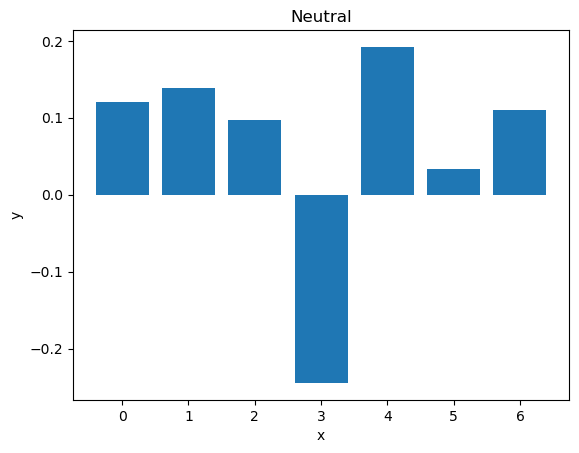

In [22]:
x_v = np.arange(0,7,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [23]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'neutral' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'e

In [24]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [25]:
X

array([[ 6.96783066e-01,  7.60599150e-02,  0.00000000e+00,
         5.05261540e-01,  0.00000000e+00,  1.70563817e-01,
         0.00000000e+00],
       [ 7.62581825e-01,  8.78661950e-02,  1.90637276e-01,
         9.44160700e-01,  6.34986760e-02,  2.23710269e-01,
         6.99488401e-01],
       [ 8.81357074e-01,  2.65408218e-01,  0.00000000e+00,
         3.60803336e-01,  0.00000000e+00,  3.17074478e-01,
         6.84188010e-02],
       [ 1.53366238e-01,  2.03428492e-01,  0.00000000e+00,
         3.58316004e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 9.19903159e-01,  7.15983629e-01,  0.00000000e+00,
         2.24678844e-01,  0.00000000e+00,  0.00000000e+00,
         1.72890842e-01],
       [ 3.55541646e-01,  9.70494032e-01,  1.87566116e-01,
         1.23870093e-02,  1.87566116e-01,  1.87566116e-01,
         1.87566116e-01],
       [ 6.27316952e-01,  9.31576967e-01,  1.00000012e+00,
         6.90859914e-01,  1.00000012e+00,  1.58697188e-01,
         1.0000001

In [26]:
model.score(X,y)

0.48

In [27]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [28]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.377778 (0.180534)


In [29]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.4


In [30]:
print(confusion_matrix(Y_validation, predictions))

[[0 3 0]
 [0 4 0]
 [0 3 0]]


In [31]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         3
   entailment       0.40      1.00      0.57         4
      neutral       0.00      0.00      0.00         3

     accuracy                           0.40        10
    macro avg       0.13      0.33      0.19        10
 weighted avg       0.16      0.40      0.23        10



c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
